In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import numpy as np

In [ ]:
#Tell matplotlib to export text to PDFs as editable text instead of image
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'

In [40]:
#Read in the excel spreadsheet containing enriched GO terms for each pattern with fold enrichment and adjusted p values
df = pd.read_excel('Summary_table_GO_2.xlsx')

In [41]:
df

,GO_biological_process,Pattern,Fold_enrichment,pAdj
0,response to interleukin-2 (GO:0070669),Brown,16.07,2.460000e-02
1,NADH regeneration (GO:0006735),Brown,11.90,5.060000e-03
2,glucose catabolic process to pyruvate (GO:0061...,Brown,11.90,5.060000e-03
3,canonical glycolysis (GO:0061621),Brown,11.90,5.060000e-03
4,glycolytic process through glucose-6-phosphate...,Brown,10.71,1.100000e-02
...,...,...,...,...
87,mitochondrial respiratory chain complex I asse...,Turquoise,4.03,1.320000e-11
88,negative regulation of mitotic sister chromati...,Turquoise,4.01,5.460000e-05
89,negative regulation of mitotic sister chromati...,Turquoise,4.01,5.460000e-05
90,negative regulation of sister chromatid segreg...,Turquoise,4.01,5.460000e-05


Add a new column and store the negative log of the adjusted p value

In [42]:
df['neg_log_pAdj']=np.log(df['pAdj'])* -1

In [43]:
df

,GO_biological_process,Pattern,Fold_enrichment,pAdj,neg_log_pAdj
0,response to interleukin-2 (GO:0070669),Brown,16.07,2.460000e-02,3.705009
1,NADH regeneration (GO:0006735),Brown,11.90,5.060000e-03,5.286389
2,glucose catabolic process to pyruvate (GO:0061...,Brown,11.90,5.060000e-03,5.286389
3,canonical glycolysis (GO:0061621),Brown,11.90,5.060000e-03,5.286389
4,glycolytic process through glucose-6-phosphate...,Brown,10.71,1.100000e-02,4.509860
...,...,...,...,...,...
87,mitochondrial respiratory chain complex I asse...,Turquoise,4.03,1.320000e-11,25.050804
88,negative regulation of mitotic sister chromati...,Turquoise,4.01,5.460000e-05,9.815477
89,negative regulation of mitotic sister chromati...,Turquoise,4.01,5.460000e-05,9.815477
90,negative regulation of sister chromatid segreg...,Turquoise,4.01,5.460000e-05,9.815477


Get rid of the go term ID to simplify the text

In [52]:
df['GO_biological_process_short'] = df['GO_biological_process'].str.replace(r'\s\(GO:.*', '', regex=True)

In [53]:
df

,GO_biological_process,Pattern,Fold_enrichment,pAdj,neg_log_pAdj,GO_biological_process_short
0,response to interleukin-2 (GO:0070669),Brown,16.07,2.460000e-02,3.705009,response to interleukin-2
1,NADH regeneration (GO:0006735),Brown,11.90,5.060000e-03,5.286389,NADH regeneration
2,glucose catabolic process to pyruvate (GO:0061...,Brown,11.90,5.060000e-03,5.286389,glucose catabolic process to pyruvate
3,canonical glycolysis (GO:0061621),Brown,11.90,5.060000e-03,5.286389,canonical glycolysis
4,glycolytic process through glucose-6-phosphate...,Brown,10.71,1.100000e-02,4.509860,glycolytic process through glucose-6-phosphate
...,...,...,...,...,...,...
87,mitochondrial respiratory chain complex I asse...,Turquoise,4.03,1.320000e-11,25.050804,mitochondrial respiratory chain complex I asse...
88,negative regulation of mitotic sister chromati...,Turquoise,4.01,5.460000e-05,9.815477,negative regulation of mitotic sister chromati...
89,negative regulation of mitotic sister chromati...,Turquoise,4.01,5.460000e-05,9.815477,negative regulation of mitotic sister chromati...
90,negative regulation of sister chromatid segreg...,Turquoise,4.01,5.460000e-05,9.815477,negative regulation of sister chromatid segreg...


Check to see if any GO terms occur in more than one of the pattern groups

In [11]:
if len(pd.unique(df['GO_biological_process'])) == len(df['GO_biological_process']):
    print("All GO terms are unique to one pattern")
    
else:
        print("Some GO terms are overlapping")
        

All GO terms are unique to one pattern


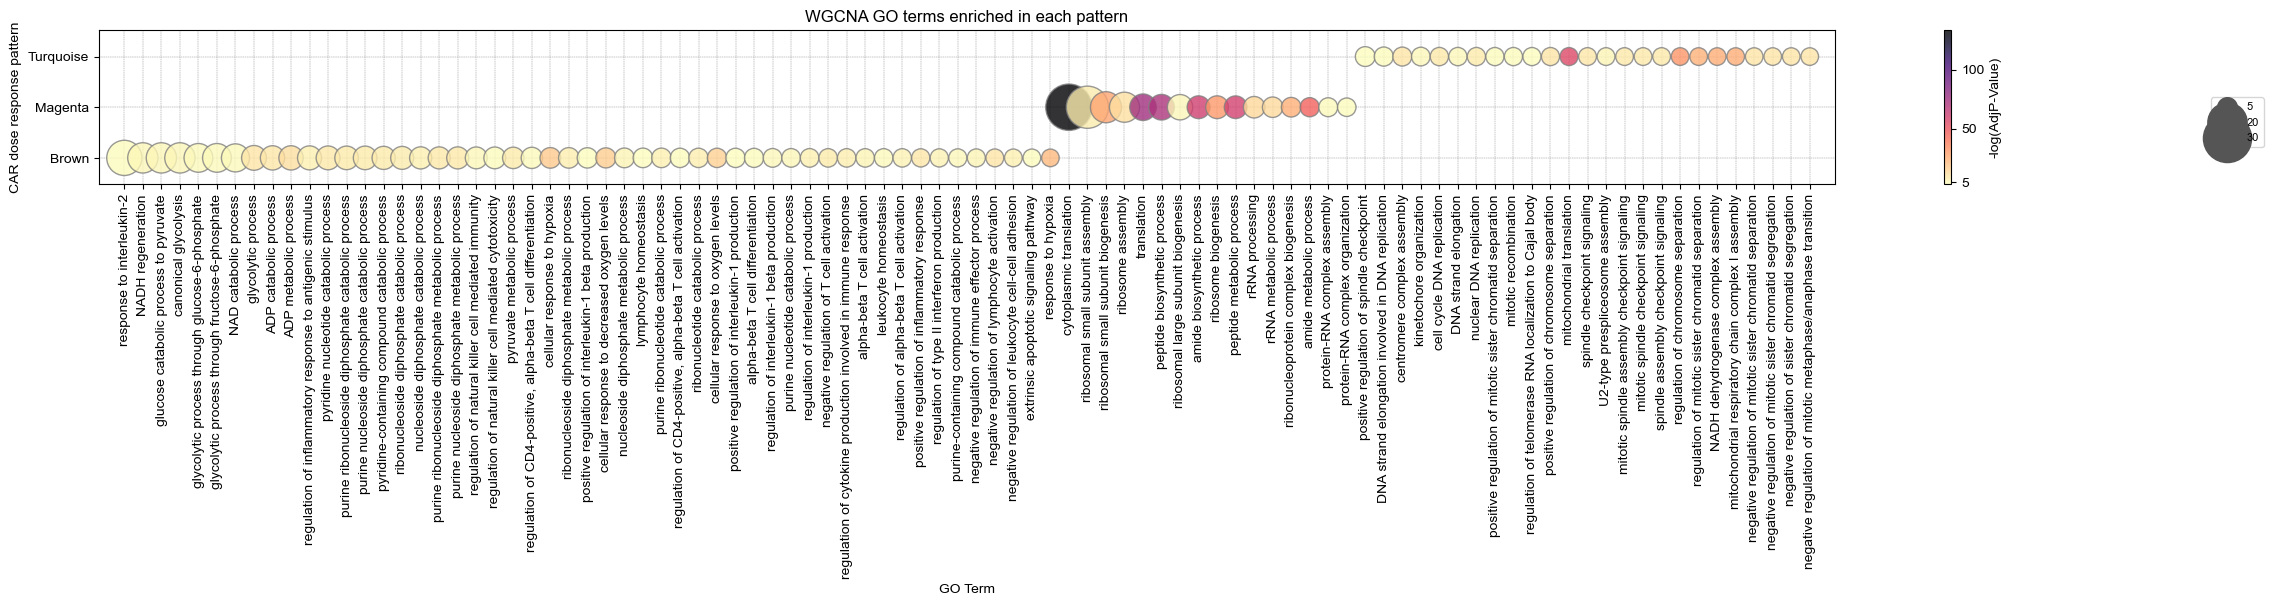

In [85]:
# assign the variables we want to plot 
x = df['GO_biological_process_short']
y = df['Pattern']
z = df['Fold_enrichment']
col = df['neg_log_pAdj']

# Set the plot height and width
plt.figure(figsize=(28,2))
plt.margins(0.015,0.26)
# Change color with c and transparency with alpha.
plt.scatter(x, y, s=z*40, c=col, cmap="magma_r", alpha=0.8, edgecolors="grey", linewidth=1, zorder=5)

#Add a colorbar
cbar = plt.colorbar(ticks=[5,50,100])
cbar.set_label('-log(AdjP-Value)')

#Add a legend for the bubble sizes, remember that we are using a scale factor of 40 between z and the bubble size, keep this in mind for the legend
gll = plt.scatter([],[], s=200, marker='o', color='#555555')
gl = plt.scatter([],[], s=800, marker='o', color='#555555')
ga = plt.scatter([],[], s=1200, marker='o', color='#555555')

plt.legend((gll,gl,ga),
       ('5', '20', '30'),
       scatterpoints=1,
       ncol=1,
       fontsize=8,
       bbox_to_anchor = (1.25, 0.6))

#Rotate the x axis labels
plt.xticks(rotation = 90)

#Add gridlines and specify style
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)

# Add titles (main and on axis)
plt.xlabel("GO Term")
plt.ylabel("CAR dose response pattern")
plt.title("WGCNA GO terms enriched in each pattern")

#save the figure as a PDF
plt.savefig('test.pdf', format ='pdf', dpi = 300)

# Show the graph
plt.show()